<a href="https://colab.research.google.com/github/PPareun/DeepLearningTextBook/blob/main/KKeyword_Extractor/Keyword_Ver1/Ko_KWFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install kss

  Created wheel for kss: filename=kss-4.2.0-py3-none-any.whl size=44268 sha256=5ff73c294ef96bb02f68d2b4de2f7542d2a174a0cee5524c3bc668efb2ebfe05
  Stored in directory: /root/.cache/pip/wheels/15/3b/c4/462c17d555c6d154f1240433ee3d3fcd4ea58da6ca02f81041
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646667 sha256=73291313262239012c424401b68e24c9a0840c82a78297b118ed7a194488eef9
  Stored in directory: /root/.cache/pip/wheels/a9/98/a3/085a909aa25805f321467a3af3b80d43b6094ed335b4818775
Successfully built kss pecab


In [ ]:
import kss

In [ ]:
#크롤링
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NewsResult_20200929-20221229.xlsx')
df.head()

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100501e+06,20221229,파이낸셜뉴스,강재웅 기자 (kjw@fnnews.com),2022년 가전 키워드는 ‘리스타트(Restart)’,경제>유통,경제>서비스_쇼핑,IT_과학>모바일,NaN,NaN,NaN,NaN,NaN,"타이푼,리스타트,전자랜드,신흥","키워드,가전,리스타트,Restart,재개,엔데믹,시대,야외,활동,가전,관심,전자랜드...","판매량,전자랜드,엔데믹,단말기,리스타트,소비자들,태블릿,가전업계,소비자,신흥,액티비티",엔데믹 시대 야외 활동 재개에 관련 가전에 관심 \n \n[파이낸셜뉴스] \n 전자...,http://www.fnnews.com/news/202212290817298695,NaN
1,2.100501e+06,20221229,파이낸셜뉴스,구자윤 기자 (solidkjy@fnnews.com),"한화테크윈, 스마트파킹 사업 진출.. 전용앱 '모플' 공개",IT_과학>모바일,IT_과학>보안,NaN,사고>교통사고>해상사고,NaN,NaN,NaN,"서울,63컨벤션센터,한국","모플,SI,한화테크윈,파트너","한화테크윈,진출,스마트,파킹,사업,전용앱,모플,공개,한화테크윈,63컨벤션,서울,컨벤...","한화테크윈,쇼케이스,파트너사,파킹,서울,경쟁력,주차관제,한국,고객사,63컨벤션,주차...",한화테크윈이 지난 28일 서울 63컨벤션센터에서 '스마트파킹 쇼케이스'를 열고 전용...,http://www.fnnews.com/news/202212290853301570,NaN
2,2.100501e+06,20221229,파이낸셜뉴스,박문수 기자 (mj@fnnews.com),"신라면세점, 국토부 '스마트 물류센터' 인증",경제>산업_기업,IT_과학>모바일,IT_과학>보안,NaN,NaN,NaN,NaN,"인도,인천국제공항","신라면세점,ISO,국토부,국토교통부,SCM","신라면세점,물류센터,국토부,스마트,물류,센터,인증,자동,설비,높여,업무,생산,신라면...","신라면세점,물류센터,완충재,인도장,혼잡도,인천국제공항,사용량,제2통합,팀장,양진우,...",자동화 설비로 업무 생산성 높여 \n \n \n 신라면세점이 국토교통부가 주관하는 ...,http://www.fnnews.com/news/202212281756255742,NaN
3,2.100501e+06,20221229,파이낸셜뉴스,김경아 기자 (kakim@fnnews.com),"쿵월드, 블록체인 기반 NTF 관련 콘텐츠의 IP추적 등 위변조 특허 등록",IT_과학>콘텐츠,IT_과학>모바일,IT_과학>보안,NaN,NaN,NaN,NaN,NaN,"KOONG,쿵월드","쿵월드,블록체,NTF,콘텐츠,NTF,IP추적,등록,위변조,특허,불법,다운로드,탑재,...","블록체,저작권,소유권,ip,쿵월드,가능토큰,사용자,koong,nft,무방비,활성화,...",불법 다운로드 등 금지 기능 탑재 \n \n \n \n \n \n[파이낸셜뉴스] 글...,http://www.fnnews.com/news/202212281512591521,NaN
4,2.100501e+06,20221229,파이낸셜뉴스,최두선 기자 (dschoi@fnnews.com),"네오리진, ‘루나(LUNA)’ IP 활용 모바일게임 중국 판호 추진",IT_과학>콘텐츠,IT_과학>모바일,NaN,NaN,NaN,NaN,NaN,"원천,중국,태국,대만,상해,한국",LUNA,"네오리진,루나,LUNA,IP,활용,모바일,게임,중국,판호,추진,네오리진,루나,LUN...","중국,ip,태국,루나온라인,네오리진,mmorpg,루나,1위,코스튬,론칭,상반기,트루...",[파이낸셜뉴스] 네오리진이 ‘루나(LUNA)’ 지식재산권(IP)을 활용한 방치형 R...,http://www.fnnews.com/news/202212281430114103,NaN


In [ ]:
keywords, urls = df['특성추출(가중치순 상위 50개)'], df['URL']

In [ ]:
for i in range(len(keywords)):
  keywords[i] = keywords[i].split(',') 

<ipython-input-7-c8d49bc89359>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keywords[i] = keywords[i].split(',')


In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#폰트 설치
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pickle

In [ ]:
"""key,content = [],[]
for index, url in enumerate(urls[:5000]):
  print(index)
  res = requests.get(urls[index])
  soup = BeautifulSoup(res.content, 'html.parser')
  text_data = soup.find(id='article_content')
  if text_data != None:
    text = kss.split_sentences(text_data.get_text(separator=" "))
    text = [re.sub('[\n|\r|\t]', '', text[i]) for i in range(len(text)-1)]
    content.append(text)
    key.append(keywords[index])
  if index%100 == 0:
    print('save')
    with open('/content/drive/MyDrive/craw_content.pkl', 'wb') as f:
      pickle.dump(content,f)
    with open('/content/drive/MyDrive/craw_key.pkl', 'wb') as f:
      pickle.dump(key,f)

SyntaxError: ignored

In [ ]:
with open('/content/drive/MyDrive/craw_content.pkl', 'rb') as f:
    content = pickle.load(f)
with open('/content/drive/MyDrive/craw_key.pkl', 'rb') as f:
    key = pickle.load(f)
print(len(key))

4629


In [ ]:
!pip install konlpy
!pip install mecab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import tensorflow as tf
from collections import Counter
from konlpy.tag import Hannanum
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
han = Hannanum()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 38.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 2.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
def preprocess(text : str):
  text = re.sub(r'\([^)]*\)' , "", text)
  text = re.sub(r'\[[^)]*\]' , "", text)
  text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
  tokens = list(han.pos(text))
  relist = []
  N = len(tokens)
  index = 0
  while(index<N):
    word = tokens[index]
    if word[1][0] == 'F' or word[1][0] == 'S':
      concated_word = ""
      while(index < N):
        if(tokens[index][1][0] == 'N' or tokens[index][1][0] == 'F' or tokens[index][1][0] == 'S'):
          concated_word += tokens[index][0] +" "
          index+=1
        else:
          break
      relist.append(concated_word.strip())
    else:
      relist.append(word[0].strip())
      index+=1
  return relist

In [ ]:
tokenizer = Tokenizer(num_words = 150, oov_token='<UNK>')
pos_of_key = []
imp_sent_list = []
sent_list = []
for index, texts in enumerate(content):
  key_dict = {}
  for word in key[index]:
    key_dict[word] = 1
  for text in texts:
    text = re.sub(r'\([^)]*\)' , "", text)
    text = re.sub(r'\[[^)]*\]' , "", text)
    text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
    if(text.replace(" ", '') != ""):
      tokens = list(han.pos(text))
    flag = 0
    kwds = []
    count = 0
    for i,token in enumerate(tokens):
      kwd = [0 for _ in range(len(tokens))]
      if token[1] == 'N':
        count += 1
        if token[0] in key_dict:
          kwd[i] = 1
          flag = 1
        kwds.append(kwd)
    if flag:
      wrds = []
      pos_of_key.extend(kwds)
      for wrd,pos in tokens: 
        wrds.append(wrd)
      for _ in range(count):
        imp_sent_list.append(wrds)
        sent_list.append(text)
tokenizer.fit_on_texts(imp_sent_list)

In [ ]:
print(len(imp_sent_list))
print(sent_list[:6])
print(pos_of_key[:6])

666406
['엔데믹 시대 야외 활동 재개에 관련 가전에 관심        전자랜드 타이푼에서 고객들이 뷰티 케어 기기를 체험하고 있다', '엔데믹 시대 야외 활동 재개에 관련 가전에 관심        전자랜드 타이푼에서 고객들이 뷰티 케어 기기를 체험하고 있다', '엔데믹 시대 야외 활동 재개에 관련 가전에 관심        전자랜드 타이푼에서 고객들이 뷰티 케어 기기를 체험하고 있다', '엔데믹 시대 야외 활동 재개에 관련 가전에 관심        전자랜드 타이푼에서 고객들이 뷰티 케어 기기를 체험하고 있다', '엔데믹 시대 야외 활동 재개에 관련 가전에 관심        전자랜드 타이푼에서 고객들이 뷰티 케어 기기를 체험하고 있다', '엔데믹 시대 야외 활동 재개에 관련 가전에 관심        전자랜드 타이푼에서 고객들이 뷰티 케어 기기를 체험하고 있다']
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
oov = [w for w,c in tokenizer.word_counts.items() if c<10]
for word in oov:
  if word in tokenizer.word_index:
    del tokenizer.word_index[word]

In [ ]:
max_len = 70
vocab_size = len(tokenizer.word_index)+1
embedding_dim = 128
hidden_units = 256

In [ ]:
print(vocab_size)

66054


In [ ]:
X_data = []
start = 0
while(start<len(imp_sent_list)):
  print(start)
  if sent_list[start].replace(" ", "") != "":
    tokens = han.pos(sent_list[start])
  count = 0
  for word, pos in tokens:
    if pos == 'N':
      count += 1
  start += count
  now = -1
  while(count>0):
    x = []
    flag = 0
    for index, (word, pos) in enumerate(tokens):
      if pos == 'N' and now < index and flag == 0:
        flag = 1
        now = index
        x.append(1)
      elif word in tokenizer.word_index:
        x.append(tokenizer.word_index[word])
      else:
        x.append(1)
    X_data.append(x)
    count -= 1

In [ ]:
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = [0 for _ in range(len(pos_of_key))]
for i in range(len(pos_of_key)):
  y_data[i] = sum(pos_of_key[i])

In [ ]:
print(len(tokenizer.word_index))

69613


In [ ]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
ones = []
zeros = []
for i in range(len(y_data)):
  if y_data[i] == 1:
    ones.append(i)
  else:
    zeros.append(i)

In [ ]:
data_it = ones
data_it.extend(zeros[:len(ones)])

In [ ]:
data_it = np.array(data_it)

In [ ]:
np.random.shuffle(data_it)

In [ ]:
X = []
y = []
for index in data_it:
  X.append(X_data[index])
  y.append(y_data[index])
X = np.array(X)
y = np.array(y)

In [ ]:
model = models.load_model('/content/drive/MyDrive/Ko-KWFPUNK.h5')

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True)) #Word Embedding
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dropout(.5))
model.add(Dense(1, activation=('sigmoid')))
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=.2, random_state=777)
history = model.fit(X_train, y_train, batch_size=128, epochs=6, validation_split=0.1)
print(model.summary())

Epoch 1/6
57/57 [==============================] - 108s 2s/step - loss: 0.6853 - accuracy: 0.5532 - val_loss: 0.6651 - val_accuracy: 0.6087
Epoch 2/6
57/57 [==============================] - 86s 2s/step - loss: 0.5359 - accuracy: 0.7456 - val_loss: 0.6212 - val_accuracy: 0.6750
Epoch 3/6
57/57 [==============================] - 89s 2s/step - loss: 0.2748 - accuracy: 0.8957 - val_loss: 0.6787 - val_accuracy: 0.6862
Epoch 4/6
57/57 [==============================] - 83s 1s/step - loss: 0.1568 - accuracy: 0.9408 - val_loss: 0.8095 - val_accuracy: 0.6900
Epoch 5/6
57/57 [==============================] - 83s 1s/step - loss: 0.1214 - accuracy: 0.9526 - val_loss: 0.8325 - val_accuracy: 0.6938
Epoch 6/6
57/57 [==============================] - 90s 2s/step - loss: 0.1114 - accuracy: 0.9564 - val_loss: 0.8407 - val_accuracy: 0.6925
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_

In [ ]:
model.save('/content/drive/MyDrive/Ko-KWFPUNK.h5')

In [ ]:
from tensorflow.python.framework.func_graph import save_context
from wordcloud import WordCloud
from collections import Counter
def pred(text : str):
  test_data = []
  text = re.sub(r'\([^)]*\)' , "", text)
  text = re.sub(r'\[[^)]*\]' , "", text)
  text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s.-]", "", text)
  sents = kss.split_sentences(text)
  keywords = []
  noun_list = []
  for sent in sents:
    count = 0
    if(text.replace(" ", '') != ""):
      tokens = han.pos(sent)
    for index, (word, pos) in enumerate(tokens):
      if pos == 'N':
        count += 1
        noun_list.append(word)
    now = -1
    while(count>0):
      x = []
      flag = 0
      for index, (word, pos) in enumerate(tokens):
        if pos == 'N' and now < index and flag == 0:
          flag = 1
          now = index
          x.append(1)
        elif word in tokenizer.word_index:
          x.append(tokenizer.word_index[word])
        else:
          x.append(1)
      test_data.append(x)
      count -= 1
  test_data = pad_sequences(test_data, padding='post', maxlen=max_len)
  y_pred = model.predict(test_data)
  print(y_pred)
  for index, predict in enumerate(y_pred):
    if predict > 0.5:
      print(noun_list[index])
      keywords.append(noun_list[index])
  keywords = Counter(keywords)
  print(keywords)
  wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, max_font_size=250)
  gen = wc.generate_from_frequencies(Counter(keywords))
  plt.figure()
  plt.imshow(gen)

In [ ]:
pred('"""' + input("한국어 text를 입력해주세요.") + '"""')

NameError: ignored

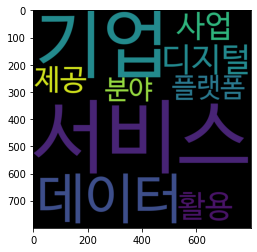

In [ ]:
kp = [(49996, '서비스'), (41834, '기업'), (33440, '데이터'), (32562, '디지털'), (28158, '사업'), (26960, '활용'), (26876, '제공'), (25780, '플랫폼'), (24436, '분야')]
d = {}
for i , j in kp:
  d[j] = i

wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(d)
plt.figure()
plt.imshow(gen)